# **Decision Trees Model**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline
import random as rand

NURAY WORK

In [ ]:
dta = pd.read_csv('cps.csv')

<ipython-input-58-e599174c5bc0>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dta = pd.read_csv('cps.csv')


In [ ]:
dta = dta[['year', 'age', 'sex', 'whyabsnt','incwage','health']]
# only included people who ARE employed, post 2010

In [ ]:
dta
# provide info on the data - the years, se

,year,age,sex,whyabsnt,incwage,health
0,2010,46,male,niu,44000.0,good
1,2010,40,female,niu,0.0,good
2,2010,30,female,niu,22000.0,good
3,2010,33,male,niu,41000.0,good
4,2010,34,female,niu,10354.0,very good
...,...,...,...,...,...,...
779551,2018,31,female,niu,88000.0,excellent
779552,2018,35,female,niu,21257.0,very good
779553,2018,35,male,niu,39671.0,very good
779554,2018,58,female,niu,61000.0,very good


In [ ]:
print(dta.describe())

                year            age       incwage
count  779556.000000  779556.000000  7.795550e+05
mean     2013.759513      41.936379  4.535340e+04
std         2.491096      13.732360  6.132234e+04
min      2010.000000       6.000000  0.000000e+00
25%      2012.000000      31.000000  1.500000e+04
50%      2014.000000      42.000000  3.300000e+04
75%      2016.000000      52.000000  5.800000e+04
max      2018.000000      85.000000  1.699999e+06


In [ ]:
print(dta.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779556 entries, 0 to 779555
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   year      779556 non-null  int64  
 1   age       779556 non-null  int64  
 2   sex       779555 non-null  object 
 3   whyabsnt  779555 non-null  object 
 4   incwage   779555 non-null  float64
 5   health    779555 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 35.7+ MB
None


Data Exploration + Cleaning

In [ ]:
df = dta.copy()

# Convert categorical variables into numerical values
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

# go through each health rating, make it a scale of 1 to 5
df['health'] = df['health'].replace({'excellent': 5, 'very good': 4, 'good': 3, 'fair': 2, 'poor': 1})
# delete rows that have 0 salary, only want to look at woman who are employed
df = df[df['incwage'] != 0]
# some have really high, going to remove (99999999.0)
df = df[df['incwage'] != 99999999.0]
# age from 25 to 65
df = df[df['age'] > 24]
df = df[df['age'] < 66]
# Delete missing values
df = df.dropna()
# only want to look at maternity/paternity leave
df['whyabsnt'] = df['whyabsnt'].replace({'maternity/paternity leave': 1, 'vacation/personal days': 0, 'other': 0, 'weather affected job': 0, 'other family/personal obligation': 0, 'school/training': 0, 'child care problems': 0, 'labor dispute': 0, 'own illness/injury/medical problems':0, 'civic/military duty':0})
# dropping niu
df = df[df['whyabsnt'] != 'niu']

In [ ]:
df

,year,age,sex,whyabsnt,incwage,health
30,2010,41,1.0,0,6000.0,3.0
86,2010,59,0.0,0,12100.0,2.0
132,2010,59,1.0,0,20000.0,3.0
175,2010,59,0.0,0,1000.0,4.0
235,2010,56,1.0,0,7000.0,3.0
...,...,...,...,...,...,...
779479,2018,43,0.0,0,42000.0,2.0
779504,2018,33,0.0,0,10000.0,2.0
779505,2018,30,1.0,0,29000.0,5.0
779533,2018,50,1.0,0,80000.0,5.0


In [ ]:
pd.DataFrame(df.describe())

,year,age,sex,incwage,health
count,16781.000000,16781.000000,16781.000000,1.678100e+04,16781.000000
mean,2013.777069,44.306776,0.577379,5.101118e+04,3.785591
std,2.509090,11.240174,0.493991,6.873177e+04,1.019727
min,2010.000000,25.000000,0.000000,2.500000e+01,1.000000
25%,2012.000000,35.000000,0.000000,2.000000e+04,3.000000
50%,2014.000000,44.000000,1.000000,3.700000e+04,4.000000
75%,2016.000000,54.000000,1.000000,6.000000e+04,5.000000
max,2018.000000,65.000000,1.000000,1.099999e+06,5.000000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16781 entries, 30 to 779546
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      16781 non-null  int64  
 1   age       16781 non-null  int64  
 2   sex       16781 non-null  float64
 3   whyabsnt  16781 non-null  object 
 4   incwage   16781 non-null  float64
 5   health    16781 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 917.7+ KB
None


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# read the data into a DataFrame

# select the columns for the feature matrix and the label vector
X = df[['year', 'age', 'sex', 'incwage', 'health']]
y = df['whyabsnt'].astype(str)

# define the number of trees to create
num_trees = 10

# create a list to store the accuracy scores
scores = []

# create and evaluate the trees
for i in range(num_trees):
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # create a decision tree classifier
    tree = DecisionTreeClassifier()
    
    # fit the classifier to the training data
    tree.fit(X_train, y_train)
    
    # evaluate the classifier on the testing data
    accuracy = tree.score(X_test, y_test)
    scores.append(accuracy)

# calculate the average accuracy
avg_accuracy = sum(scores) / num_trees

print(f"Average accuracy: {avg_accuracy}")


Average accuracy: 0.886058981233244


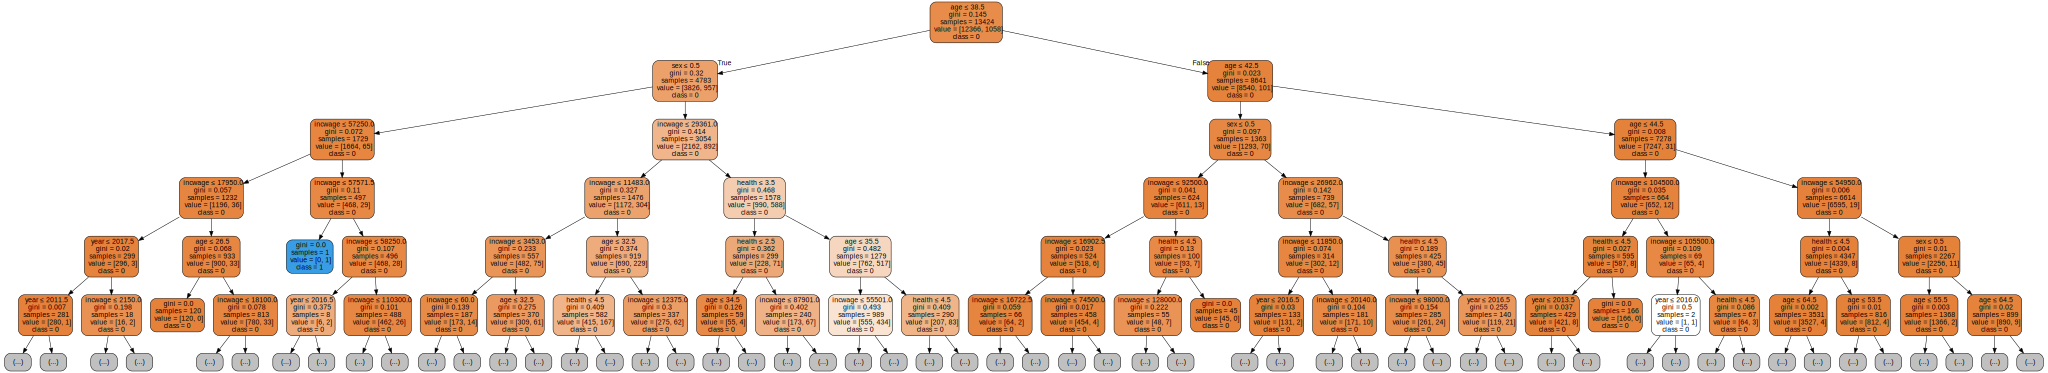

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree, 
                           out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.unique(),  
                           filled=True, 
                           rounded=True,  
                           max_depth=5, 
                           special_characters=True)

graph = graphviz.Source(dot_data)  
graph


Cross-validation: to make sure alg doesnt overfit

In [ ]:
from sklearn.model_selection import cross_val_score

# evaluate the classifier using cross-validation, 10 folds
scores = cross_val_score(tree, X, y, cv=10)

# print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.88 (+/- 0.03)


In [ ]:
!pip install pyperclip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11124 sha256=d40919a39afd5d47c1304726205f548c2ea8b148aec7fc83169624fd1f49d666
  Stored in directory: /root/.cache/pip/wheels/04/24/fe/140a94a7f1036003ede94579e6b4227fe96c840c6f4dcbe307
Successfully built pyperclip


A decision tree is a powerful machine learning algorithm that can tell you a lot of things about your data. Here are some examples:

1. Feature Importance: A decision tree can tell you which features are the most important for making predictions. This information can be used to understand the underlying relationships in your data and to focus on the most important variables when developing future models.

2. Predictions: A decision tree can be used to make predictions about new, unseen data. Once the tree has been trained on a set of labeled examples, it can be used to classify new examples into one of the known classes.

3. Outliers: A decision tree can help you identify outliers in your data. Outliers are data points that do not follow the expected pattern or distribution. A decision tree can flag these data points as outliers and suggest further investigation.

4. Relationships: A decision tree can help you identify relationships between different variables in your data. For example, a decision tree might show that people with a certain combination of age, sex, and income are more likely to be absent from work than others.

5. Overfitting: A decision tree can help you identify when your model is overfitting the data. Overfitting occurs when a model is too complex and captures noise in the data instead of the underlying patterns. A decision tree can be used to identify the optimal complexity of the model and prevent overfitting.

Overall, a decision tree is a powerful tool for understanding and analyzing your data. It can help you identify important features, make predictions, and uncover relationships between different variables in your data.

In [ ]:
# save the image to a file
graph.render('tree_4', format='png')

'tree_4.png'

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# read the data into a DataFrame

# select the columns for the feature matrix and the label vector
X = df[['year', 'age', 'sex', 'incwage', 'health']]
y = df['whyabsnt'].astype(str)

# define the number of trees to create
num_trees = 10

# create a list to store the accuracy scores
scores = []

# create and evaluate the trees
for i in range(num_trees):
    # split the data into training and testing sets
    X = df[['year', 'age', 'sex', 'incwage', 'health']]
    y = df['whyabsnt'].astype(str)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a decision tree classifier with default hyperparameters
    tree = DecisionTreeClassifier(max_depth = 4)

    # Fit the classifier to the training data
    tree.fit(X_train, y_train)

    # Evaluate the classifier on the testing data
    accuracy = tree.score(X_test, y_test)
    scores.append(accuracy)

# calculate the average accuracy
avg_accuracy = sum(scores) / num_trees

print(f"Average accuracy: {avg_accuracy}")


Average accuracy: 0.9231456657730115


In [ ]:
importances = tree.feature_importances_
df.DataFrame(importances)

AttributeError: ignored

decreasing max depth didnt do anything, so going to cut some of the features

In [ ]:
cross_val_score(tree, X, y,
                scoring="accuracy", 
                cv=5).mean()

0.9228889840416713

could be because of covariance: run this code on the data

In [ ]:
import numpy as np

# Create a sample dataset with 3 features and 5 observations
data = X

# Calculate the covariance matrix
cov_matrix = np.cov(data.T)

# Print the covariance matrix
pd.DataFrame(cov_matrix)


,0,1,2,3,4
0,6.295531,0.131624,0.014122,9.881835e+03,0.058456
1,0.131624,126.341521,-0.409973,6.216748e+04,-1.964256
2,0.014122,-0.409973,0.244027,-5.731960e+03,0.012063
3,9881.835101,62167.481505,-5731.960377,4.724056e+09,7854.220182
4,0.058456,-1.964256,0.012063,7.854220e+03,1.039842


if yes, do PCA

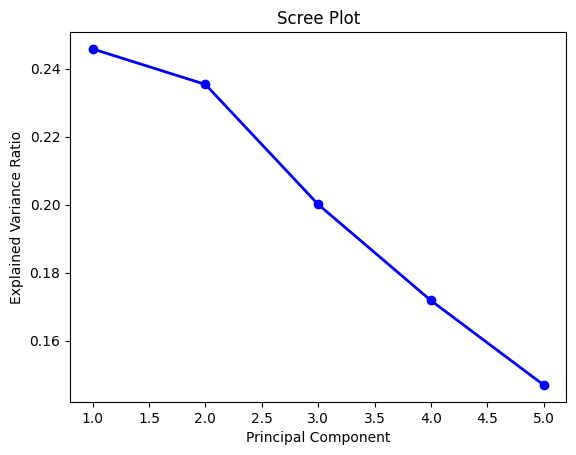

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load iris dataset

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Fit PCA and obtain explained variance ratios
pca = PCA()
pca.fit(X_std)
variance_ratios = pca.explained_variance_ratio_

# Plot the scree plot
fig, ax = plt.subplots()
ax.plot(np.arange(1, len(variance_ratios)+1), variance_ratios, 'bo-', linewidth=2)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scree Plot')
plt.show()


In [ ]:
# now only doing 4 features

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# read the data into a DataFrame

# select the columns for the feature matrix and the label vector
X = df[['year', 'age', 'sex', 'incwage', 'health']]
y = df['whyabsnt'].astype(str)

# define the number of trees to create
num_trees = 10

# create a list to store the accuracy scores
scores = []

# create and evaluate the trees
for i in range(num_trees):
    # split the data into training and testing sets
    X = df[['age', 'sex', 'incwage', 'health']]
    y = df['whyabsnt'].astype(str)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a decision tree classifier with default hyperparameters
    tree = DecisionTreeClassifier(max_depth = 4)

    # Fit the classifier to the training data
    tree.fit(X_train, y_train)

    # Evaluate the classifier on the testing data
    accuracy = tree.score(X_test, y_test)
    scores.append(accuracy)

# calculate the average accuracy
avg_accuracy = sum(scores) / num_trees

print(f"Average accuracy: {avg_accuracy}")

Average accuracy: 0.9231456657730115


In [ ]:
importances = tree.feature_importances_
print(importances)

[0.50007889 0.35061032 0.11633898 0.03297181]


In [ ]:
cross_val_score(tree, X, y,
                scoring="accuracy", 
                cv=5).mean()

0.9228889840416713

# **Linear Regression Model**
How does a man’s professional standing compare to a woman’s after having children, measured by salary?

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline
import random as rand
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
rand.seed(123)

Data Cleaning + Exploration

In [ ]:
new_df = pd.read_stata('cps_00016.dta')

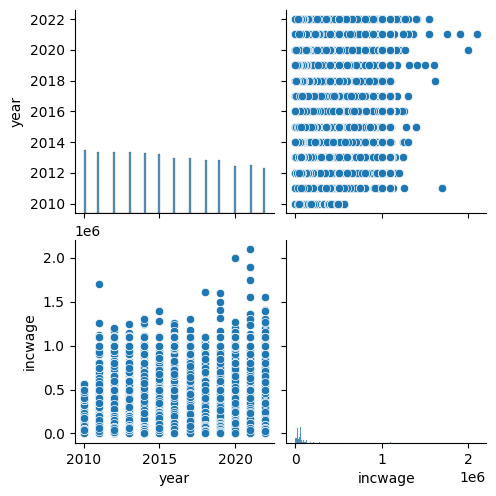

In [ ]:
sns.pairplot(new_df)

In [ ]:
new_df['sex'] = new_df['sex'].replace({'male': 0, 'female': 1})
# not married = 0, married = 1
new_df['marst'] = new_df['marst'].replace({'never married/single': 0, 
     'married, spouse present': 1, 
     'married, spouse absent': 1, 
     'separated': 0, 
     'divorced': 0, 
     'widowed': 0})
# no children = 0, has children = 1
new_df['nchild'] = new_df['nchild'].replace({
    '0 children present': 0,
    '1 child present': 1,
    '2': 1,
    '3': 1,
    '4': 1,
    '5': 1,
    '6': 1,
    '7': 1,
    '8': 1,
    '9+': 1
})
new_df['whyabsnt'] = new_df['whyabsnt'].replace({
    'niu': -1, 
    'on temporary layoff (under 30 days)': 0, 
    'on indefinite layoff (30+ days)': 0, 
    'waiting for a new job to begin': 0,
    'vacation/personal days': 0, 
    'own illness/injury/medical problems': 0, 
    'child care problems': 0, 
    'other family/personal obligation': 0,
    'maternity/paternity leave': 1, 
    'labor dispute': 0, 
    'weather affected job': 0,
    'school/training': 0, 
    'civic/military duty': 0, 
    'other': 0
})
new_df = new_df[new_df['whyabsnt'] != -1]
# <hs = 0, hs = 1, <ug = 2, ug = 3, >ug = 4 
new_df['educ'] = new_df['educ'].replace({'none or preschool': 0,
    'grades 1, 2, 3, or 4': 0,
    'grade 1': 0,
    'grade 2': 0,
    'grade 3': 0,
    'grade 4': 0,
    'grades 5 or 6': 0,
    'grade 5': 0,
    'grade 6': 0,
    'grades 7 or 8': 0,
    'grade 7': 0,
    'grade 8': 0,
    'grade 9': 1,
    'grade 10': 1,
    'grade 11': 1,
    '12th grade, no diploma': 1,
    '12th grade, diploma unclear': 1,
    'high school diploma or equivalent': 1,
    '1 year of college': 2,
    'some college but no degree': 2,
    '2 years of college': 2,
    "associate's degree, occupational/vocational program": 2,
    "associate's degree, academic program": 2,
    '3 years of college': 2,
    '4 years of college': 3,
    'bachelor\'s degree': 3,
    '5 years of college': 3,
    '6+ years of college': 4,
    'master\'s degree': 4,
    'professional school degree': 4,
    'doctorate degree': 4,
    'missing/unknown': -1})
new_df = new_df[new_df['educ'] != -1]
new_df = new_df[new_df['incwage'] != 0]
new_df = new_df[new_df['incwage'] != 99999999.0]
new_df = new_df[new_df['year'] >= 2010]
# at work and maternatiy leave (not at work last week): 1 
new_df['empstat'] = new_df['empstat'].replace({
    'at work': 1,
    'has job, not at work last week': 1,
    'armed forces': 0,
    'unemployed, experienced worker': 0,
    'unemployed, new worker': 0,
    'nilf, unable to work': 0,
    'nilf, other': 0,
    'nilf, retired': 0
})
# working full time: 1
new_df['wkstat'] = new_df['wkstat'].replace({'full-time hours (35+), usually full-time': 1,
                                             'part-time for non-economic reasons, usually full-time': 1,
                                             'not at work, usually full-time': 1,
                                             'full-time hours, usually part-time for economic reasons': 0,
                                             'full-time hours, usually part-time for non-economic reasons': 0,
                                             'part-time for economic reasons, usually full-time': 0,
                                             'part-time hours, usually part-time for economic reasons': 0,
                                             'part-time hours, usually part-time for non-economic reasons': 0,
                                             'not at work, usually part-time': 0,
                                             'unemployed, seeking full-time work': 0,
                                             'unemployed, seeking part-time work': 0,
                                             'niu, blank, or not in labor force': 0})

In [ ]:
new_df = new_df.dropna()

In [ ]:
new_df

,year,age,sex,marst,nchild,empstat,whyabsnt,wkstat,educ,incwage
39,2010,41,1,1,1,1,0,0,1,6000
113,2010,59,0,1,1,1,0,1,1,12100
154,2010,59,1,0,0,1,0,1,3,20000
206,2010,59,0,1,0,1,0,1,1,1000
284,2010,56,1,1,0,1,0,0,1,7000
...,...,...,...,...,...,...,...,...,...,...
1268875,2022,43,0,0,0,1,0,1,2,30000
1268887,2022,58,1,0,0,1,0,1,3,25000
1268923,2022,25,1,0,0,1,0,0,2,31680
1268951,2022,31,1,0,0,1,0,0,1,45002


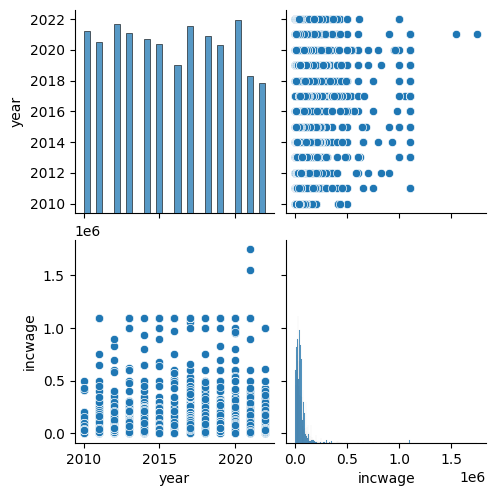

In [ ]:
sns.pairplot(new_df)

In [ ]:
X = new_df[['sex', 'marst', 'nchild', 'empstat', 'whyabsnt', 'wkstat', 'educ']]
y = new_df['incwage']

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (14722, 7), (14722,)
Validation set: (4908, 7), (4908,)
Test set: (4908, 7), (4908,)


In [ ]:
X_train = sm.add_constant(X_train)
lin_model = sm.OLS(y_train, X_train).fit()
print(lin_model.summary())

X_val = sm.add_constant(X_val)
y_pred_val = lin_model.predict(X_val)

X_test = sm.add_constant(X_test)
y_pred_test = lin_model.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     337.2
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        19:12:33   Log-Likelihood:            -1.8490e+05
No. Observations:               14722   AIC:                         3.698e+05
Df Residuals:                   14715   BIC:                         3.699e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex        -2.498e+04   1217.343    -20.522      0.0

In [ ]:
r2_val = r2_score(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)

print("R-squared on validation set:", r2_val)
print("MSE on validation set:", mse_val)

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)

print(f"R-squared on test set:", r2)
print(f"MSE on test set:", mse)

R-squared on validation set: 0.11054904176524016
MSE on validation set: 5480209430.126058
R-squared on test set: 0.13455379298933767
MSE on test set: 3879393279.51452


In this model, we take features that seem to impact an individual's standing at work. These features include: sex, marst: marital status, nchild: the number of children the individual has, emptstat: if they are actually at work, whyabsnt: if they are on maternity or paternity leave, wkstat: if they are working full time, and educ: their education level. We find that all these features are signifcant with the exception of empstat and whyabsnt. After looking at the evaluative measures of the model we find that the R squared value is relatively low and the mean squared error is relatively high for both the validation and test sets. This indicates that the model is not doing a good job predicting the target variable, incwage. We need to continue make some adjustments to ensure that the model can actually predict the professional standing of an individual.

## Ridge Regression

In [ ]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_val_pred = ridge_model.predict(X_val)

y_test_pred = ridge_model.predict(X_test)


r2_val = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print("Ridge R-squared on validation set:", r2_val)
print("Ridge MSE on validation set:", mse_val)

print("Ridge R-squared on test set:", r2)
print("Ridge MSE on test set:", mse)

Ridge R-squared on validation set: 0.11054882426700263
Ridge MSE on validation set: 5480210770.206567
Ridge R-squared on test set: 0.13455409803207996
Ridge MSE on test set: 3879391912.1496224


Adding a Ridge Regularizer to the model did not improve the model. If we want to make a prediction of the model, we must do some more feature engineering or data transformations to improve the model.

In [ ]:
X = new_df[['sex', 'marst', 'nchild', 'educ']]
y = new_df['incwage']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (14722, 4), (14722,)
Validation set: (4908, 4), (4908,)
Test set: (4908, 4), (4908,)


In [ ]:
X_train = sm.add_constant(X_train)
new_lin_model = sm.OLS(y_train, X_train).fit()
print(new_lin_model.summary())

X_val = sm.add_constant(X_val)
y_val_pred = new_lin_model.predict(X_val)

X_test = sm.add_constant(X_test)
y_test_pred = new_lin_model.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     423.8
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        19:12:48   Log-Likelihood:            -1.8505e+05
No. Observations:               14722   AIC:                         3.701e+05
Df Residuals:                   14717   BIC:                         3.701e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.345e+04   1621.501     14.461      0.0

In [ ]:
y_val_pred = new_lin_model.predict(X_val)

y_test_pred = new_lin_model.predict(X_test)


r2_val = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print("R-squared on validation set:", r2_val)
print("MSE on validation set:", mse_val)

print("R-squared on test set:", r2)
print("MSE on test set:", mse)

R-squared on validation set: 0.0868735375831785
MSE on validation set: 5626082252.095943
R-squared on test set: 0.11566007719198201
MSE on test set: 3964085029.845822


After removing non-significant features like empstat and whyabsnt the model still does not improve in predicting incwage. If anything, the model has worsened with the removal of empstat and whyabsnt.

Only Looking at Sex, Nchild, and Educ

In [ ]:
X = new_df[['sex', 'nchild', 'educ']]
y = new_df['incwage']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (14722, 3), (14722,)
Validation set: (4908, 3), (4908,)
Test set: (4908, 3), (4908,)


In [ ]:
X_train = sm.add_constant(X_train)
data_lin_model = sm.OLS(y_train, X_train).fit()
print(data_lin_model.summary())

X_val = sm.add_constant(X_val)
y_pred_val = data_lin_model.predict(X_val)

X_test = sm.add_constant(X_test)
y_pred_test = data_lin_model.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     553.5
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        19:12:58   Log-Likelihood:            -1.8506e+05
No. Observations:               14722   AIC:                         3.701e+05
Df Residuals:                   14718   BIC:                         3.702e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.658e+04   1523.347     17.450      0.0

In [ ]:
y_val_pred =  data_lin_model.predict(X_val)

y_test_pred =  data_lin_model.predict(X_test)


r2_val = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print("R-squared on validation set:", r2_val)
print("MSE on validation set:", mse_val)

print("R-squared on test set:", r2)
print("MSE on test set:", mse)

R-squared on validation set: 0.08522794492020347
MSE on validation set: 5636221307.370761
R-squared on test set: 0.11103036752755446
MSE on test set: 3984837867.4142256


# **Logistic Regression**
What is the probability a woman will return to the same (or higher) professional standing after having children?

In [ ]:
X_train_sub = X_train[:7000]
y_train_sub = y_train[:7000]
X = new_df[['sex', 'nchild', 'whyabsnt']]
y = new_df['incwage']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (14722, 3), (14722,)
Validation set: (4908, 3), (4908,)
Test set: (4908, 3), (4908,)


In [ ]:
X_train_sub = X_train[:7000]
y_train_sub = y_train[:7000]

In [104]:
lr_model = LogisticRegression()
lr_model.fit(X_train_sub, y_train_sub)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.03687856560717197


Create a new binary variable indicating whether the woman returned to the same or higher professional standing after having children, using incwage as standard.

In [106]:
new_data = pd.read_stata("cps_00017.dta")

In [107]:
new_data['sex'] = new_data['sex'].replace({'male': 0, 'female': 1})
# not married = 0, married = 1
new_data['marst'] = new_data['marst'].replace({'never married/single': 0, 
     'married, spouse present': 1, 
     'married, spouse absent': 1, 
     'separated': 0, 
     'divorced': 0, 
     'widowed': 0})
# no children = 0, has children = 1
new_data['nchild'] = new_data['nchild'].replace({
    '0 children present': 0,
    '1 child present': 1,
    '2': 1,
    '3': 1,
    '4': 1,
    '5': 1,
    '6': 1,
    '7': 1,
    '8': 1,
    '9+': 1
})
new_data['whyabsnt'] = new_data['whyabsnt'].replace({
    'niu': -1, 
    'on temporary layoff (under 30 days)': 0, 
    'on indefinite layoff (30+ days)': 0, 
    'waiting for a new job to begin': 0,
    'vacation/personal days': 0, 
    'own illness/injury/medical problems': 0, 
    'child care problems': 0, 
    'other family/personal obligation': 0,
    'maternity/paternity leave': 1, 
    'labor dispute': 0, 
    'weather affected job': 0,
    'school/training': 0, 
    'civic/military duty': 0, 
    'other': 0
})
new_data = new_data[new_data['whyabsnt'] != -1]
# <hs = 0, hs = 1, <ug = 2, ug = 3, >ug = 4 
new_data['educ'] = new_data['educ'].replace({'none or preschool': 0,
    'grades 1, 2, 3, or 4': 0,
    'grade 1': 0,
    'grade 2': 0,
    'grade 3': 0,
    'grade 4': 0,
    'grades 5 or 6': 0,
    'grade 5': 0,
    'grade 6': 0,
    'grades 7 or 8': 0,
    'grade 7': 0,
    'grade 8': 0,
    'grade 9': 1,
    'grade 10': 1,
    'grade 11': 1,
    '12th grade, no diploma': 1,
    '12th grade, diploma unclear': 1,
    'high school diploma or equivalent': 1,
    '1 year of college': 2,
    'some college but no degree': 2,
    '2 years of college': 2,
    "associate's degree, occupational/vocational program": 2,
    "associate's degree, academic program": 2,
    '3 years of college': 2,
    '4 years of college': 3,
    'bachelor\'s degree': 3,
    '5 years of college': 3,
    '6+ years of college': 4,
    'master\'s degree': 4,
    'professional school degree': 4,
    'doctorate degree': 4,
    'missing/unknown': -1})
new_data = new_data[new_data['educ'] != -1]
new_data = new_data[new_data['incwage'] != 0]
new_data = new_data[new_data['incwage'] != 99999999.0]
new_data = new_data[new_data['year'] >= 2010]
# at work and maternatiy leave (not at work last week): 1 
new_data['empstat'] = new_data['empstat'].replace({
    'at work': 1,
    'has job, not at work last week': 1,
    'armed forces': 0,
    'unemployed, experienced worker': 0,
    'unemployed, new worker': 0,
    'nilf, unable to work': 0,
    'nilf, other': 0,
    'nilf, retired': 0
})
# working full time: 1
new_data['wkstat'] = new_data['wkstat'].replace({'full-time hours (35+), usually full-time': 1,
                                             'part-time for non-economic reasons, usually full-time': 1,
                                             'not at work, usually full-time': 1,
                                             'full-time hours, usually part-time for economic reasons': 0,
                                             'full-time hours, usually part-time for non-economic reasons': 0,
                                             'part-time for economic reasons, usually full-time': 0,
                                             'part-time hours, usually part-time for economic reasons': 0,
                                             'part-time hours, usually part-time for non-economic reasons': 0,
                                             'not at work, usually part-time': 0,
                                             'unemployed, seeking full-time work': 0,
                                             'unemployed, seeking part-time work': 0,
                                             'niu, blank, or not in labor force': 0})
new_data['occly'] = new_data['occly'].apply(lambda x: 1 if x in [1000, 1005, 1006, 1007, 1220] else 0)

<ipython-input-107-275593bd2d8d>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['educ'] = new_data['educ'].replace({'none or preschool': 0,


In [108]:
new_data = new_data.dropna()
new_data

,year,age,sex,marst,nchild,empstat,whyabsnt,wkstat,educ,occly,incwage
39,2010,41,1,1,1,1,0,0,1,0,6000
113,2010,59,0,1,1,1,0,1,1,0,12100
154,2010,59,1,0,0,1,0,1,3,0,20000
206,2010,59,0,1,0,1,0,1,1,0,1000
284,2010,56,1,1,0,1,0,0,1,0,7000
...,...,...,...,...,...,...,...,...,...,...,...
1268875,2022,43,0,0,0,1,0,1,2,0,30000
1268887,2022,58,1,0,0,1,0,1,3,0,25000
1268923,2022,25,1,0,0,1,0,0,2,0,31680
1268951,2022,31,1,0,0,1,0,0,1,0,45002


In [109]:
df_returned = new_data.copy()

# Step 2
df_returned['returned'] = 0

# Step 3
for index, row in df_returned.iterrows():
    education = row['educ']
    marst = row['marst']
    nchild = row['nchild']
    incwage = row['incwage']
    
    median_incwage = new_data[(new_data['educ']==education) & (new_data['marst']==marst) & (new_data['nchild']==nchild) & (new_data['nchild']!=0)]['incwage'].median()
    
    if incwage >= median_incwage:
        df_returned.at[index, 'returned'] = 1

In [110]:
new_data['returned'] = new_data['incwage'] >= df_returned['incwage'].mean()
features = ['year', 'age', 'sex', 'marst', 'nchild', 'empstat', 'whyabsnt', 'wkstat', 'educ', 'occly']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(new_data[features], new_data['returned'], test_size=0.2, random_state=42)

In [112]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [113]:
y_pred = logreg.predict(np.array(X_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7355338223308884
Precision: 0.6606217616580311
Recall: 0.45808383233532934
F1 score: 0.541018387553041


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
